I have identified mouse brain cell type-specific protein coding genes with pairwise dN/dS calculated from 92 mammalian species against human reference genome. Now I want to know which cell types have significantly higher dN/dS. This script calcuated these statistics. 

In [1]:
import numpy as np
import pandas as pd
import pingouin as pg
import glob
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 10)
from scipy import stats
import heapq

In [ ]:
celltype_list=['neuron','endothelia','glia','astrocyte','microglia','oligodendrocyte']

In [ ]:
# load dN/dS data
df_dict={}
for celltype in celltype_list:
    df_dict[celltype]=pd.read_csv('../results/mouse.celltype-specific_genes/protein-coding_w_dNdS/all_92species/'
                                  +celltype+'.tsv',index_col=0, sep='\t')

In [4]:
df_dict['neuron']

,amelanoleuca_dNdS,anancymaae_dNdS,bbbison_dNdS,bmutus_dNdS,btaurus_dNdS,capalliatus_dNdS,caperea_dNdS,catys_dNdS,ccanadensis_dNdS,ccapucinus_dNdS,...,sscrofa_dNdS,tbelangeri_dNdS,tgelada_dNdS,ttruncatus_dNdS,uamericanus_dNdS,umaritimus_dNdS,uparryii_dNdS,vpacos_dNdS,vursinus_dNdS,vvulpes_dNdS
Gene name,,,,,,,,,,,,,,,,,,,,,
1500009L16Rik,NaN,0.146464,NaN,NaN,NaN,NaN,0.130144,0.120498,0.136314,0.140044,...,0.124107,NaN,0.122453,NaN,NaN,NaN,0.228487,NaN,0.156414,0.313078
1700001L19Rik,0.210556,0.185317,NaN,NaN,NaN,0.198950,0.122481,0.218690,NaN,0.160872,...,NaN,NaN,0.203604,NaN,0.258322,0.215824,0.150904,NaN,0.145022,0.110891
4930444P10Rik,NaN,0.409015,0.315946,0.326234,0.316695,0.348993,NaN,0.367046,0.290463,0.394530,...,0.284890,NaN,0.377320,NaN,0.442945,0.285058,0.333066,NaN,NaN,NaN
4930447C04Rik,0.306745,0.288215,0.290376,0.285083,NaN,0.302765,NaN,0.286950,0.357752,0.273928,...,0.285087,NaN,0.285519,0.281480,NaN,NaN,0.266246,NaN,0.346056,0.286567
4930452B06Rik,0.252119,0.210142,NaN,NaN,0.237885,0.255776,0.301566,0.266231,0.259158,0.225319,...,0.244310,NaN,0.235612,NaN,NaN,0.255673,0.205110,NaN,0.204127,0.228056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zim1,0.006937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.360649,NaN,...,NaN,NaN,NaN,NaN,0.041359,NaN,NaN,0.006681,0.135717,NaN
Zkscan16,NaN,0.351751,NaN,0.340327,NaN,0.355999,NaN,0.348691,0.331307,0.366090,...,0.293102,NaN,0.349349,0.341637,NaN,0.339294,0.374028,0.458960,NaN,0.356438
Zmat4,0.053008,0.032676,0.035883,0.035889,0.035482,0.041024,0.028862,0.053054,NaN,0.034377,...,0.044406,NaN,0.117155,NaN,NaN,0.051398,0.040253,NaN,0.093579,0.051676


# All species cell type-specific genes' pairwise dN/dS against mouse genome pooled together without averaging

In [4]:
# pool dN/dS from 92 species into 1D array
arr_dict={}
for celltype in celltype_list:
    arr=df_dict[celltype].to_numpy()
    arr=arr[~np.isnan(arr)]
    arr_dict[celltype]=arr
    arr_dict[celltype].shape

(86260,)

(61687,)

(80131,)

(56301,)

(68157,)

(35624,)

In [5]:
# Mann Whitney U test between neuron and each non-neuronal celltype
for celltype in ['endothelia','glia','astrocyte','microglia','oligodendrocyte']:
    celltype
    stats.mannwhitneyu(arr_dict['neuron'],arr_dict[celltype],alternative="two-sided")

'endothelia'

MannwhitneyuResult(statistic=1843208704.5, pvalue=0.0)

'glia'

MannwhitneyuResult(statistic=2401686399.0, pvalue=0.0)

'astrocyte'

MannwhitneyuResult(statistic=1933844695.0, pvalue=0.0)

'microglia'

MannwhitneyuResult(statistic=1882912853.0, pvalue=0.0)

'oligodendrocyte'

MannwhitneyuResult(statistic=1348618487.0, pvalue=7.702811370580747e-248)

In [7]:
# Kruskal Wallis H test for neuron, endothelia, glia three cell types
stats.kruskal(arr_dict['neuron'],arr_dict['endothelia'],arr_dict['glia'])

KruskalResult(statistic=15068.010565252689, pvalue=0.0)

In [8]:
# Kruskal Wallis H test for NEAMO five cell types
stats.kruskal(arr_dict['neuron'],arr_dict['endothelia'],arr_dict['astrocyte'],arr_dict['microglia'],arr_dict['oligodendrocyte'])

KruskalResult(statistic=19080.63760123451, pvalue=0.0)

In [6]:
stats_df = pd.DataFrame(
    columns=['Celltype','Median_dNdS',
             'Confidence_Interval_Low','Confidence_Interval_High'])

for celltype in celltype_list:
    arr=arr_dict[celltype]
    med=np.median(arr)
    low = stats.binom.interval(alpha=.95,n=arr.shape[0],p=.5)[0]
    high = stats.binom.interval(alpha=.95,n=arr.shape[0],p=.5)[1]
    CI_low = heapq.nsmallest(low.astype(int),arr)[-1]
    CI_high = heapq.nsmallest(high.astype(int),arr)[-1]
    stats_df = stats_df.append(
        {'Celltype':celltype,'Median_dNdS':med,
         'Confidence_Interval_Low':CI_low,'Confidence_Interval_High':CI_high},
        ignore_index=True)

stats_df.set_index('Celltype',inplace=True)
    
stats_df

,Median_dNdS,Confidence_Interval_Low,Confidence_Interval_High
Celltype,,,
neuron,0.070163,0.069543,0.070742
endothelia,0.118995,0.118036,0.119894
glia,0.120077,0.119231,0.120914
astrocyte,0.103976,0.102941,0.104970
microglia,0.131917,0.130960,0.132936
oligodendrocyte,0.088088,0.087188,0.089008


# Now one species at a time

In [7]:
# add average of 92 species as a "species"
# so statistical analysis looped through "species" 
# would also be calculated on the averaged value
for celltype in celltype_list:
    df=df_dict[celltype]
    df['average_dNdS']=df.mean(axis=1)

In [8]:
# Get a list of species name (including 'average' at the end of the list)
species_list=[]
for species in df_dict['neuron'].columns:
    species_list.append(species[:-5])

In [9]:
# Find the rare cases where neuron-specific genes don't have the lowest dN/dS
for species in species_list:
    if np.median(df_dict['neuron'][[species+'_dNdS']].iloc[:,0].dropna().values) > np.median(df_dict['oligodendrocyte'][[species+'_dNdS']].iloc[:,0].dropna().values):
        print(species) # Hedgehog 


eeuropaeus


##### Descriptive Statistics: median and confidence interval

In [42]:
full_dict = {} # This dictionary stores dataframes for later use 
descriptive_stats_df = pd.DataFrame(
    columns=['Species','Celltype','Median_dNdS',
             'Confidence_Interval_Low','Confidence_Interval_High',
             'Median_Absolute_Deviation'])
for species in species_list:
    full_dict[species] = {}
    for celltype in celltype_list:
        df=df_dict[celltype][[species+'_dNdS']]
        full_dict[species][celltype]=df.dropna().values
        arr=df.iloc[:,0].dropna().values
        med=np.median(arr)
        mad=pg.mad(arr,normalize=False)
        low = stats.binom.interval(alpha=.95,n=arr.shape[0],p=.5)[0]
        high = stats.binom.interval(alpha=.95,n=arr.shape[0],p=.5)[1]
        CI_low = heapq.nsmallest(low.astype(int),arr)[-1]
        CI_high = heapq.nsmallest(high.astype(int),arr)[-1]
        descriptive_stats_df = descriptive_stats_df.append(
            {'Species':species,'Celltype':celltype,'Median_dNdS':med,
             'Confidence_Interval_Low':CI_low,'Confidence_Interval_High':CI_high,
            'Median_Absolute_Deviation':mad},
            ignore_index=True)

In [44]:
common_name_df=pd.read_excel('../data/species.xlsx',index_col=0)
common_name_df=common_name_df.append(pd.Series(['average','average','average'],name='average',index=common_name_df.columns))

In [45]:
descriptive_stats_df=pd.merge(left=common_name_df,right=descriptive_stats_df,left_index=True,right_on='Species',how='right')
descriptive_stats_df.set_index('SpeciesCommonName',inplace=True)
descriptive_stats_df.drop(['SpeciesLatinName','Order','Species'],axis=1,inplace=True)

In [46]:
descriptive_stats_df.loc['average',:]

,Celltype,Median_dNdS,Confidence_Interval_Low,Confidence_Interval_High,Median_Absolute_Deviation
SpeciesCommonName,,,,,
average,neuron,0.073001,0.068361,0.076786,0.039584
average,endothelia,0.125274,0.117180,0.135850,0.066218
average,glia,0.127601,0.121065,0.134291,0.067144
average,astrocyte,0.110885,0.101351,0.117072,0.059529
average,microglia,0.142691,0.134883,0.152953,0.080206
average,oligodendrocyte,0.087372,0.081122,0.097106,0.044336


In [19]:
# create an excel file to write descriptive stats

path = '../results/celltype-specific_descriptive_stats.xlsx'
writer = pd.ExcelWriter(path, engine = 'xlsxwriter')

descriptive_stats_df.to_excel(writer, sheet_name = 'mouse reference genome',index=True)

writer.save()
writer.close()


In [47]:
# # if I want to add tab to existing excel file

# from openpyxl import load_workbook

# path = '../results/celltype-specific_descriptive_stats.xlsx'
# book = load_workbook(path)
# writer = pd.ExcelWriter(path, engine = 'openpyxl') # note the engine
# # writer = pd.ExcelWriter(path, engine = 'xlsxwriter') # use this engine if creating a new file
# writer.book = book

# descriptive_stats_df.to_excel(writer, sheet_name = 'mouse reference genome',index=True)

# writer.save()
# writer.close()

### Inferential statistics: Kruskal Wallis H and Mann Whitney U between celltypes

In [37]:
stats.mannwhitneyu(full_dict[species]['neuron'],
        full_dict[species]['glia'],alternative="two-sided")

MannwhitneyuResult(statistic=536949.0, pvalue=6.554592649494534e-43)

In [62]:
u,_,p,_,cles=pg.mwu(
    full_dict[species]['neuron'],
    full_dict[species]['glia'],
    tail='two-sided').iloc[0,:]

In [64]:
cles

0.34159712140509635

In [66]:
inferential_stats_df=pd.DataFrame(
    columns=['Species','Kruskal H NEG','Kruskal p NEG',
             'Kruskal H NEAMO','Kruskal p NEAMO',
             'Mann U NG','Mann p NG','Mann CLES NG',
             'Mann U NE','Mann p NE','Mann CLES NE',
             'Mann U EG','Mann p EG','Mann CLES EG',
             'Mann U NA','Mann p NA','Mann CLES NA',
             'Mann U NM','Mann p NM','Mann CLES NM',
             'Mann U NO','Mann p NO','Mann CLES NO'])

for species in species_list:

    h_NEG,kp_NEG=stats.kruskal(
        full_dict[species]['neuron'],
        full_dict[species]['endothelia'],
        full_dict[species]['glia'])

    h_NEAMO,kp_NEAMO=stats.kruskal(
        full_dict[species]['neuron'],
        full_dict[species]['endothelia'],
        full_dict[species]['astrocyte'],
        full_dict[species]['microglia'],
        full_dict[species]['oligodendrocyte'])
    
    # June 18, 2020: debug on Jan_20_2020-Confirming_w_Couple_Species-Ensembl98Mouse
    # June 24, 2020: debug stats.mannwhitneyu(), include alternative="two-sided", 
    # default "None" is deprecated and generate a smaller p value
    # Now avoid nan values influencing test results.
    # U statistics and p values from Mann Whitney's U test 
    # comparing Neuron-specific genes and Glia-specific genes' dN/dS ratios
    # Dec 7, 2020: Use pingouin instead of scipy, now have common language effect size
    
    u_NG,_,mp_NG,_,cles_NG=pg.mwu(
        full_dict[species]['neuron'],
        full_dict[species]['glia'],
        tail="two-sided").iloc[0,:]
    
    # similarly, compare neuron-specific genes and endothelia-specific genes
    u_NE,_,mp_NE,_,cles_NE=pg.mwu(
        full_dict[species]['neuron'],
        full_dict[species]['endothelia'],
        tail="two-sided").iloc[0,:]
    
    # and endothelia vs glia
    u_EG,_,mp_EG,_,cles_EG=pg.mwu(
        full_dict[species]['glia'],
        full_dict[species]['endothelia'],
        tail="two-sided").iloc[0,:]
    
    # and neuron vs the three glial subtypes
    u_NA,_,mp_NA,_,cles_NA=pg.mwu(
        full_dict[species]['neuron'],
        full_dict[species]['astrocyte'],
        tail="two-sided").iloc[0,:]
    
    u_NM,_,mp_NM,_,cles_NM=pg.mwu(
        full_dict[species]['neuron'],
        full_dict[species]['microglia'],
        tail="two-sided").iloc[0,:]
    
    u_NO,_,mp_NO,_,cles_NO=pg.mwu(
        full_dict[species]['neuron'],
        full_dict[species]['oligodendrocyte'],
        tail="two-sided").iloc[0,:]
    
    inferential_stats_df = inferential_stats_df.append(
            {'Species':species,'Kruskal H NEG':h_NEG,'Kruskal p NEG':kp_NEG,
            'Kruskal H NEAMO':h_NEAMO,'Kruskal p NEAMO':kp_NEAMO,
            'Mann U NG':u_NG,'Mann p NG':mp_NG,'Mann CLES NG':cles_NG,
            'Mann U NE':u_NE,'Mann p NE':mp_NE,'Mann CLES NE':cles_NE,
            'Mann U EG':u_EG,'Mann p EG':mp_EG,'Mann CLES EG':cles_EG,
            'Mann U NA':u_NA,'Mann p NA':mp_NA,'Mann CLES NA':cles_NA,
            'Mann U NM':u_NM,'Mann p NM':mp_NM,'Mann CLES NM':cles_NM,
            'Mann U NO':u_NO,'Mann p NO':mp_NO,'Mann CLES NO':cles_NO},
            ignore_index=True)

inferential_stats_df=pd.merge(left=common_name_df,right=inferential_stats_df,left_index=True,right_on='Species',how='right')
inferential_stats_df.set_index('SpeciesCommonName',inplace=True)
inferential_stats_df.drop(['SpeciesLatinName','Order','Species'],axis=1,inplace=True)

In [67]:
inferential_stats_df

,Kruskal H NEG,Kruskal p NEG,Kruskal H NEAMO,Kruskal p NEAMO,Mann U NG,Mann p NG,Mann CLES NG,Mann U NE,Mann p NE,Mann CLES NE,...,Mann CLES EG,Mann U NA,Mann p NA,Mann CLES NA,Mann U NM,Mann p NM,Mann CLES NM,Mann U NO,Mann p NO,Mann CLES NO
SpeciesCommonName,,,,,,,,,,,,,,,,,,,,,
Panda,210.041102,2.455580e-46,247.194656,2.617407e-52,339671.0,2.545612e-37,0.335577,266985.0,2.263768e-32,0.336783,...,0.497284,273956.0,2.705061e-14,0.391170,274793.0,1.447538e-41,0.318379,199485.0,0.000122,0.436749
Ma's night monkey,231.025530,6.814649e-51,289.788044,1.727282e-61,368950.0,1.297535e-36,0.340001,262855.0,1.773999e-39,0.320067,...,0.481631,303533.0,6.711266e-15,0.391524,275418.0,2.173369e-47,0.307110,204822.0,0.000019,0.430005
American bison,156.872780,8.620027e-35,191.462284,2.570749e-40,230989.0,1.974700e-28,0.342398,183131.0,6.436258e-25,0.343476,...,0.498561,187648.0,3.790698e-12,0.391259,190109.0,2.324427e-34,0.319903,128104.0,0.000021,0.422794
Wild yak,156.987769,8.138400e-35,200.750491,2.591293e-42,254962.0,1.349891e-29,0.342875,210992.0,1.048678e-23,0.352076,...,0.505908,209142.0,7.797933e-13,0.390890,206981.0,1.034526e-35,0.320008,146855.0,0.001595,0.443832
Cow,198.450180,8.074041e-44,259.249882,6.616519e-55,351161.0,6.005384e-35,0.341721,275695.0,5.492733e-31,0.341195,...,0.498598,284382.0,4.211320e-14,0.392894,270258.0,2.415733e-46,0.308425,202956.0,0.000051,0.433691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Arctic ground squirrel,248.258430,1.234147e-54,313.693014,1.204100e-66,365230.0,2.103225e-42,0.328339,272678.0,2.410950e-39,0.321978,...,0.492211,301492.0,5.630397e-17,0.383845,276919.0,4.643431e-54,0.295936,211651.0,0.000014,0.429702
Alpaca,37.164058,8.509958e-09,53.885406,5.561619e-11,10258.0,3.451595e-07,0.341592,9945.0,8.378094e-08,0.333188,...,0.492387,12670.0,1.946911e-03,0.404741,6365.0,9.605730e-11,0.282037,4229.0,0.001928,0.368830
Common wombat,113.226073,2.589827e-25,125.245555,4.044696e-26,304793.0,8.993294e-19,0.379237,232411.0,3.091230e-20,0.365685,...,0.487969,241668.0,7.370548e-10,0.408326,252333.0,9.171326e-21,0.366870,160688.0,0.000005,0.421809


In [68]:
# Create and write to excel file for inferential stats

path = '../results/celltype-specific_inferential_stats.xlsx'
writer = pd.ExcelWriter(path, engine = 'xlsxwriter')

inferential_stats_df.to_excel(writer, sheet_name = 'mouse reference genome', index=True) #July 17th, 2020: minor bug fix: include species name as index

writer.save()
writer.close()

# # if I want to add tab to existing excel file

# from openpyxl import load_workbook

# path = '../results/celltype-specific_inferential_stats.xlsx'
# book = load_workbook(path)
# writer = pd.ExcelWriter(path, engine = 'openpyxl') # note the engine
# # writer = pd.ExcelWriter(path, engine = 'xlsxwriter') # use this engine if creating a new file
# writer.book = book

# inferential_stats_df.to_excel(writer, sheet_name = 'mouse reference genome',index=True)

# writer.save()
# writer.close()

# Visualization

In [ ]:
# import statsmodels.api as sm
# import matplotlib.ticker as mtick

In [15]:
import matplotlib
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
import seaborn as sns
matplotlib.rcParams['figure.dpi']= 300
from copy import deepcopy

In [16]:
graph_dict = deepcopy(full_dict)
graph_df = pd.DataFrame(columns=['dNdS','Species','Celltype'])
for celltype in celltype_list:
    for species in species_list:
        graph_dict[species][celltype]=pd.DataFrame(graph_dict[species][celltype],columns=['dNdS'])
        graph_dict[species][celltype]=graph_dict[species][celltype].assign(Species=species)
        graph_dict[species][celltype]=graph_dict[species][celltype].assign(Celltype=celltype)
        graph_df=graph_df.append(graph_dict[species][celltype][['dNdS','Species','Celltype']],ignore_index=True)
graph_df=pd.merge(common_name_df,graph_df,left_index=True,right_on='Species',how='right')
graph_df.set_index('SpeciesCommonName',inplace=True)
graph_df.drop(['SpeciesLatinName','Order','Species'],axis=1,inplace=True)

In [80]:
graph_df

,dNdS,Celltype
SpeciesCommonName,,
Panda,0.210556,neuron
Panda,0.306745,neuron
Panda,0.252119,neuron
Panda,0.380407,neuron
Panda,0.131689,neuron
...,...,...
average,0.077988,oligodendrocyte
average,0.052152,oligodendrocyte
average,0.036849,oligodendrocyte


In [17]:
# get a list of species common names
species_common_list=common_name_df['SpeciesCommonName'].to_list()
species_common_list.remove('Mouse')

In [18]:
sns.set_style('ticks')

In [19]:
palette={'endothelia':'tab:blue','glia':'tab:green','neuron':'tab:red','oligodendrocyte':'lightblue','astrocyte':'lightgreen','microglia':'tab:orange'}

In [97]:
for species in species_common_list:
    data=graph_df.loc[species,:]
    fig = plt.figure(figsize=(10,7.5))
    ax = fig.add_subplot(111)
    ax = sns.boxplot(y="dNdS", x="Celltype", data=data,showfliers=False,palette=palette)
    ax.set_yscale('log')
    _=ax.set_ylim(0.0005,1)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    sns.despine()
    stats = add_stat_annotation(ax=ax,data=data,x="Celltype", y="dNdS",
                        box_pairs=[("endothelia", "neuron"),
                                   ("endothelia", "glia"),
                                   ("glia","neuron"),
                                   ("astrocyte","neuron"),
                                   ("microglia","neuron"),
                                   ("oligodendrocyte","neuron"),
                                   ("astrocyte","microglia"),
                                   ("microglia","oligodendrocyte"),
                                   ("astrocyte","oligodendrocyte")],
                        test='Mann-Whitney', text_format='star',
                        loc='outside', verbose=0)
    pd.DataFrame(stats[1]).to_csv('../results/mouse.celltype-specific_genes/protein-coding_w_dNdS/MannWhitney/'+species+'.tsv',sep='\t',index=False)
#     ax.set_xlabel("Cell Types")
    _=ax.set_ylabel("dN/dS of Cell Type-specific Genes")
    plt.savefig('../figures/MannWhitney/mouse_reference_genome/'+species+'.pdf')
    plt.close()

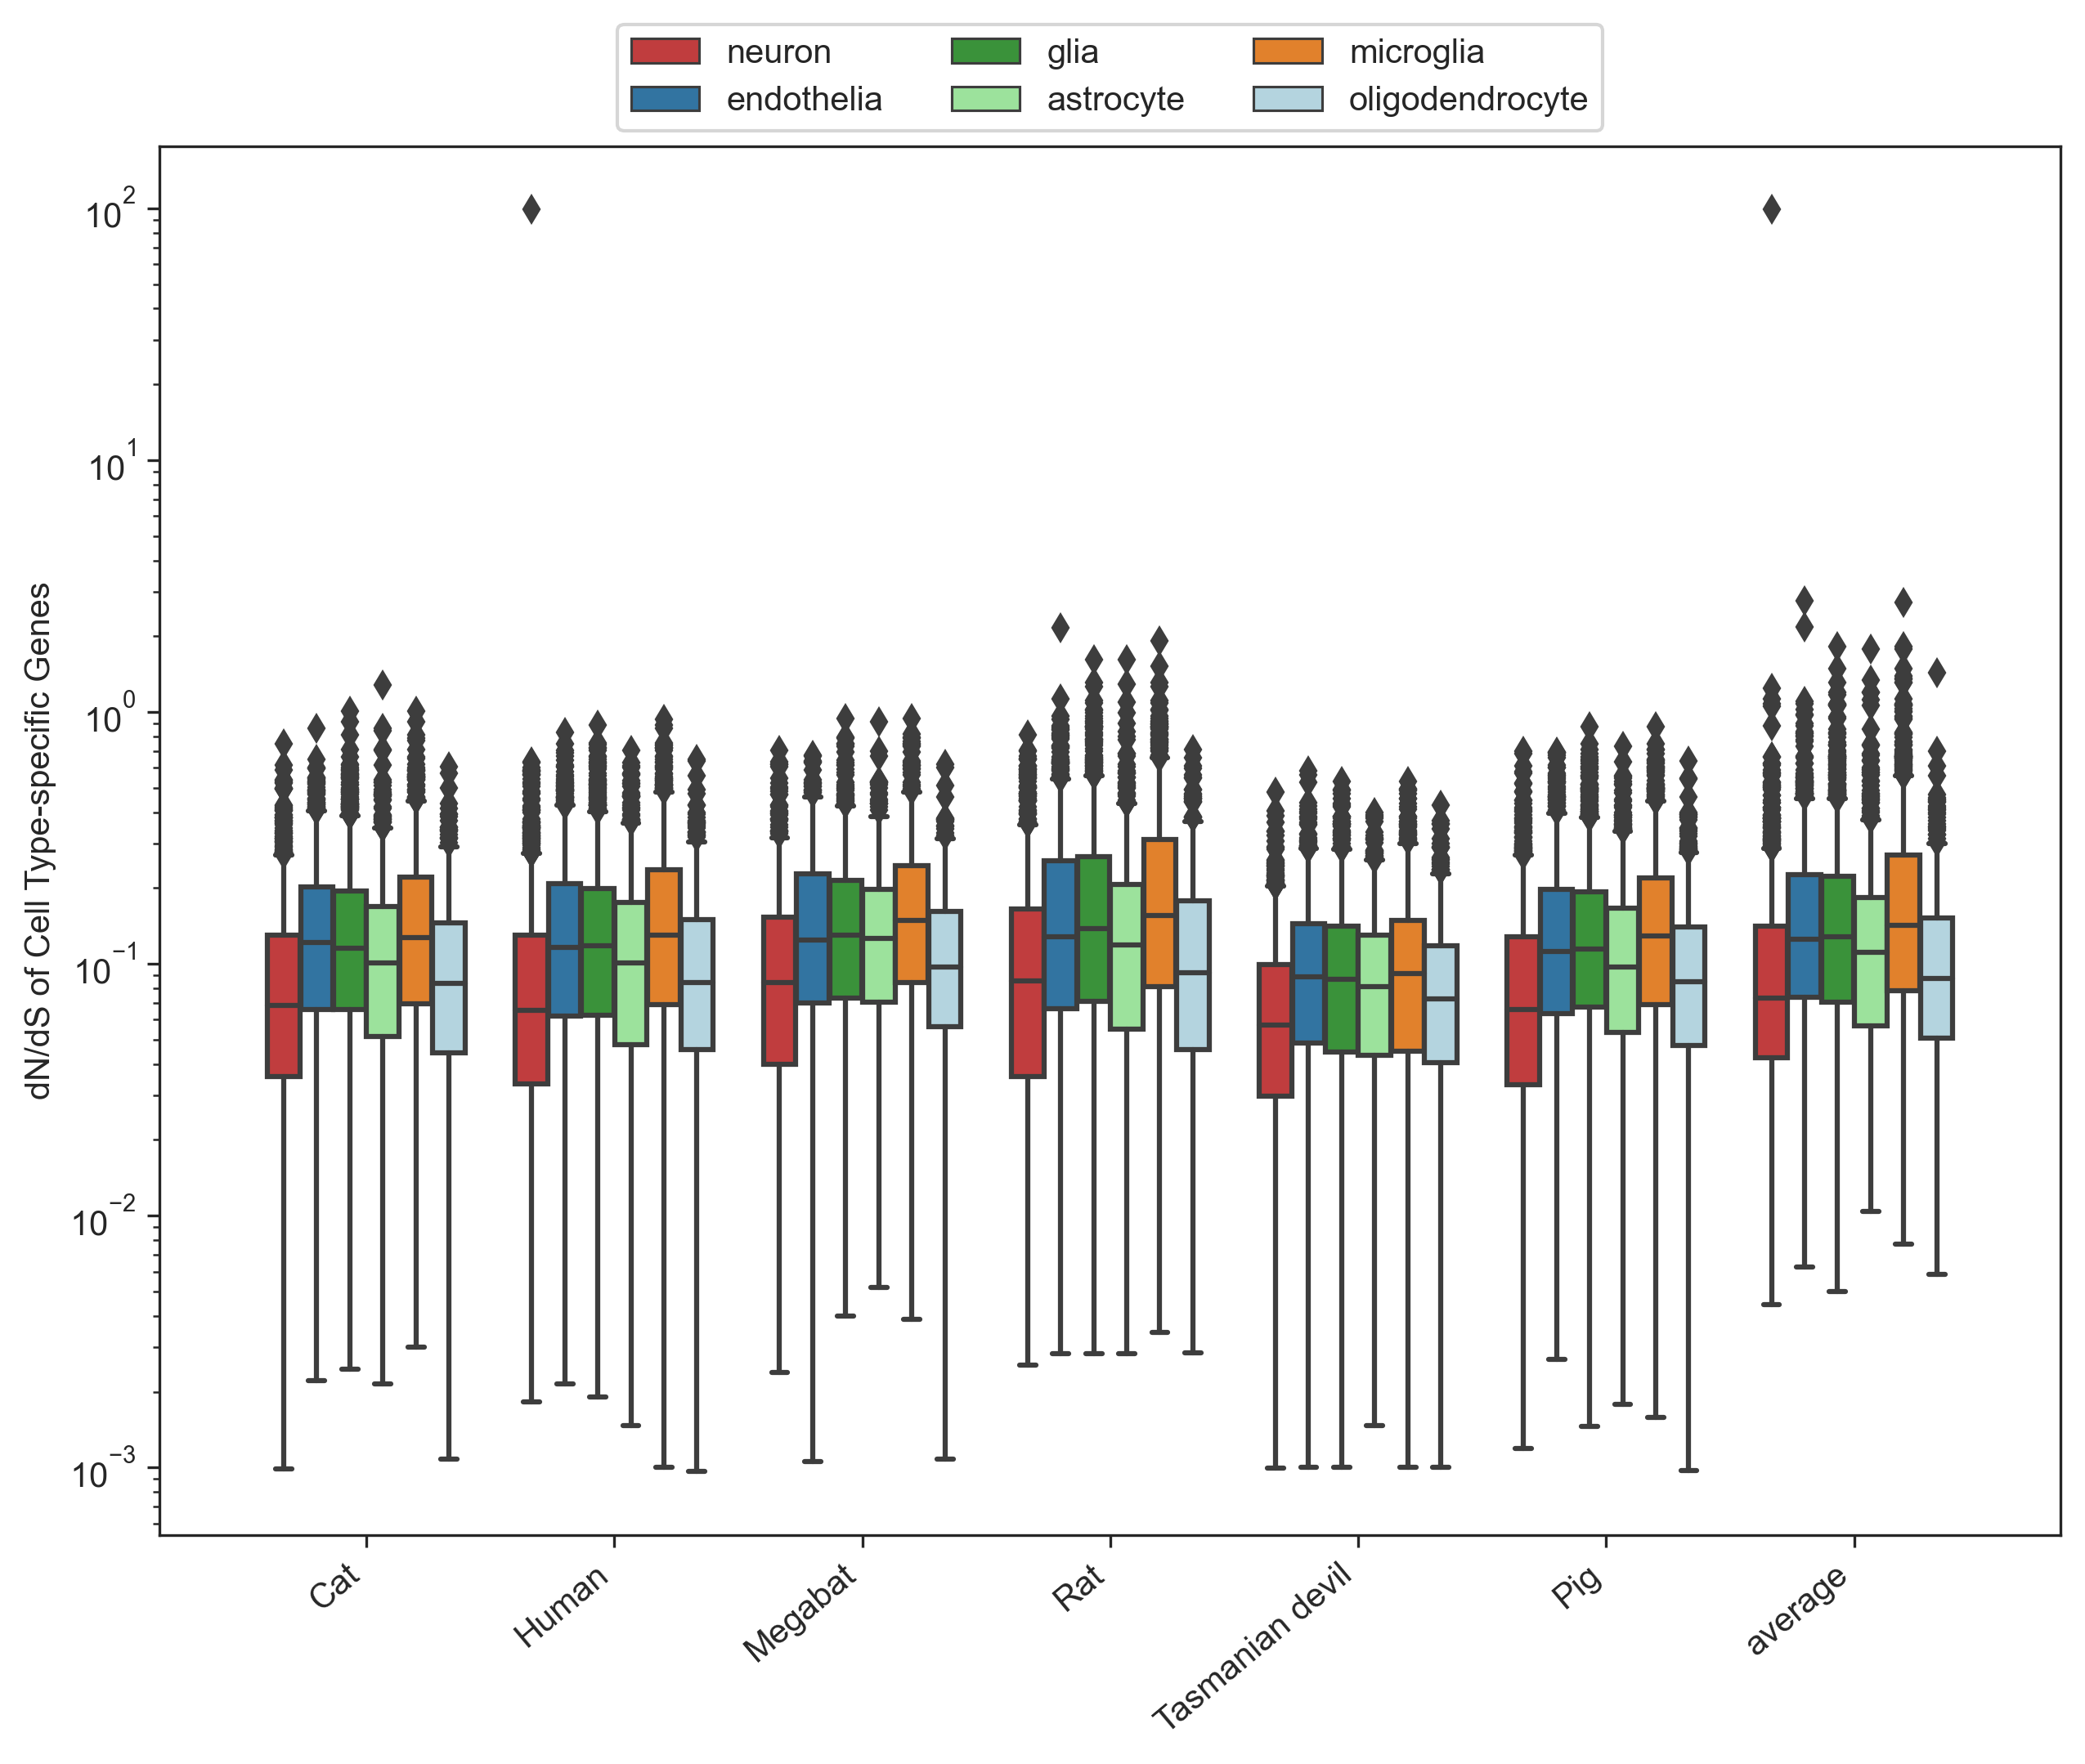

In [30]:
# Figure with some representitive species
data=graph_df[graph_df['dNdS']!=0].reset_index()
data=data[data['SpeciesCommonName'].isin(['Human','Rat','Opposum','Megabat','Tasmanian devil','Cat','Pig','average'])]
fig = plt.figure(figsize=(10,7.5))
ax = fig.add_subplot()
# flierprops = dict(marker='o',markerfacecolor='1', markersize=2,linestyle='none')
# whis=[15, 85]
ax = sns.boxplot(x="SpeciesCommonName", y="dNdS", hue="Celltype", data=data, palette=palette)
_=ax.set(yscale='log')
_=ax.set_ylim(0.0005,1)
_=ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
_=ax.legend(loc='upper center', bbox_to_anchor=(0.5,1.1),ncol=3)
_=ax.set_xlabel("")
_=ax.set_ylabel("dN/dS of Cell Type-specific Genes")
plt.autoscale()
# plt.savefig('../figures/mouse.boxplots.pdf')
plt.show()

In [21]:
# n_df=pd.DataFrame()
# n_df['dNdS']=pd.Series(n_array)
# n_df['celltype']='Neuron'
# e_df=pd.DataFrame()
# e_df['dNdS']=pd.Series(e_array)
# e_df['celltype']='Endothelial Cell'
# g_df=pd.DataFrame()
# g_df['dNdS']=pd.Series(g_array)
# g_df['celltype']='Glial Cell'
# df=pd.concat([e_df,g_df,n_df])

In [117]:
data

,SpeciesCommonName,dNdS,Celltype
0,Panda,0.210556,neuron
1,Panda,0.306745,neuron
2,Panda,0.252119,neuron
3,Panda,0.380407,neuron
4,Panda,0.131689,neuron
...,...,...,...
230307,Red fox,0.059611,glia
230308,Red fox,0.206826,glia
230309,Red fox,0.302362,glia
230310,Red fox,0.094507,glia


[None]

(0.0008, 6)

[Text(0, 0.5, 'all pairwise dN/dS scores'), Text(0.5, 0, '')]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

neuron v.s. endothelia: Mann-Whitney-Wilcoxon test two-sided P_val=0.000e+00 U_stat=1.843e+09
neuron v.s. endothelia: Mann-Whitney-Wilcoxon test two-sided P_val=0.000e+00 U_stat=1.843e+09
neuron v.s. glia: Mann-Whitney-Wilcoxon test two-sided P_val=0.000e+00 U_stat=2.402e+09


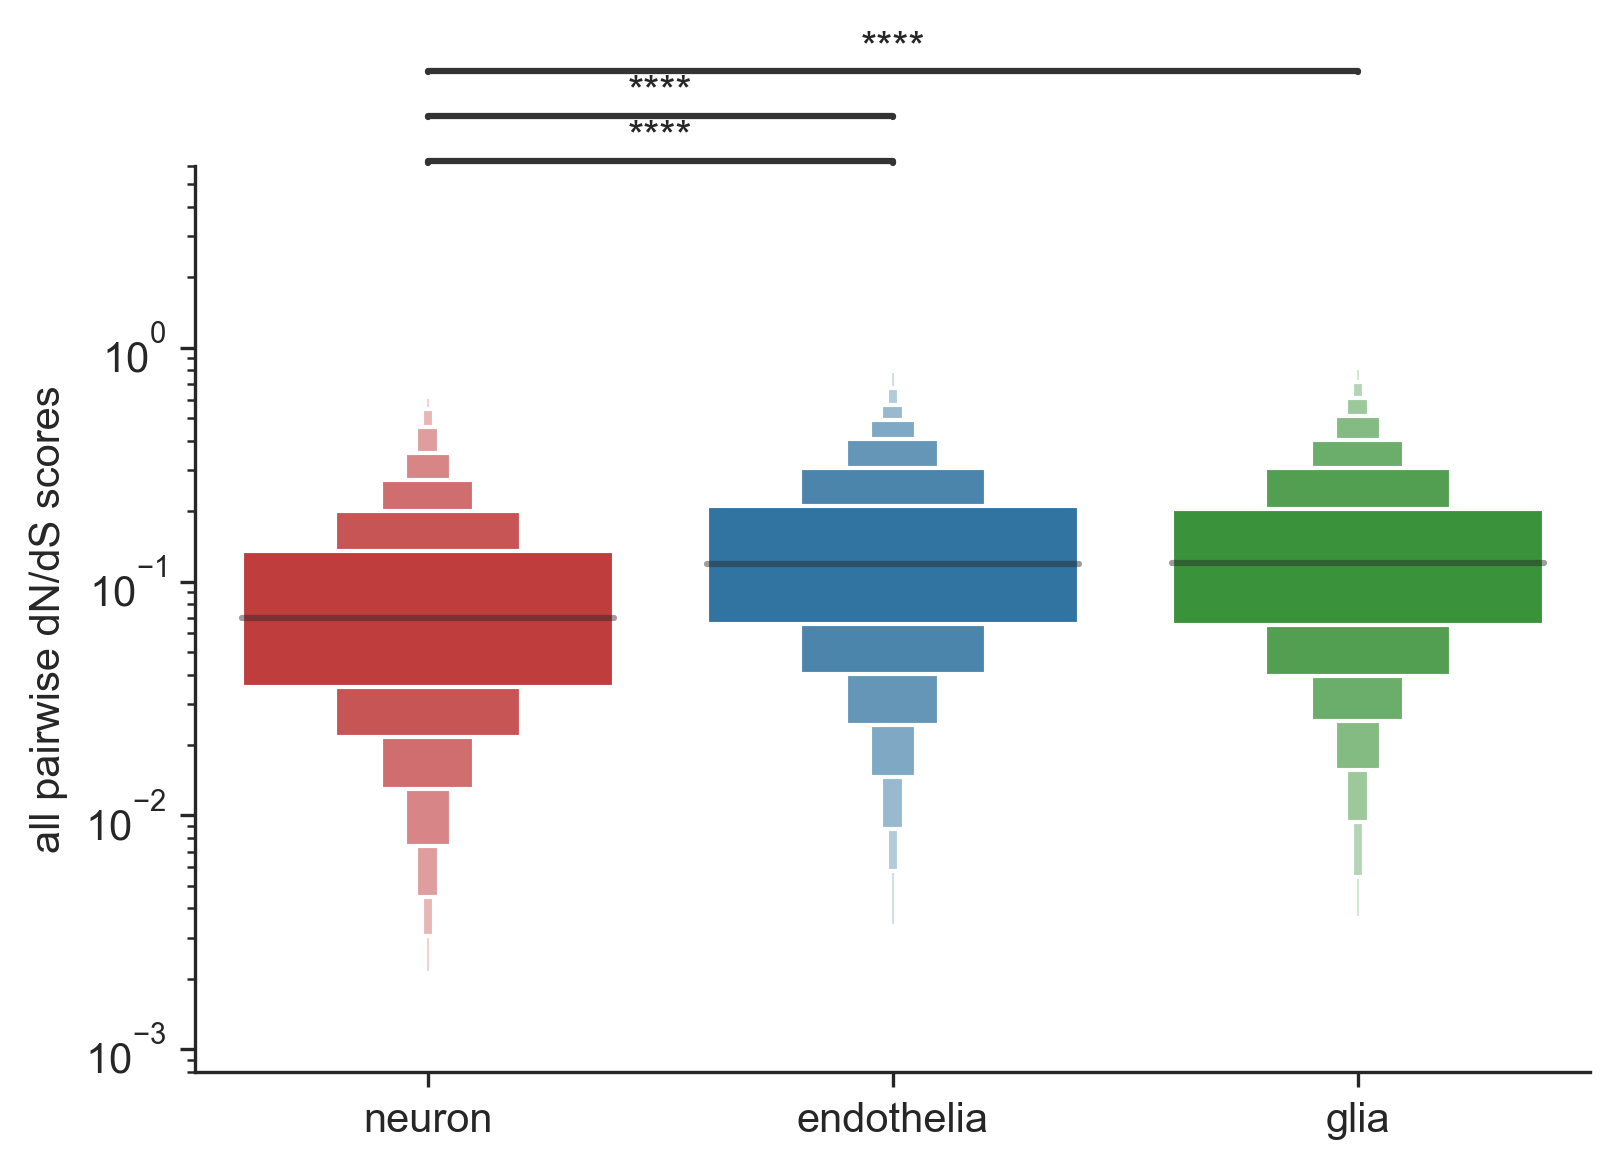

In [121]:
data=graph_df[graph_df['dNdS']!=0].reset_index()
data=data[data['Celltype'].isin(['neuron','endothelia','glia'])]
data=data[data['SpeciesCommonName']!='average']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(yscale='log')
ax.set_ylim(0.0008,6)

ax=sns.boxenplot(x='Celltype',y='dNdS',data=data,palette=palette,showfliers=False,outlier_prop=0)
ax.set(ylabel='all pairwise dN/dS scores',xlabel='')
sns.despine()
stats = add_stat_annotation(ax=ax,data=data,x="Celltype", y="dNdS",
                        box_pairs=[("endothelia", "neuron"),
                                   ("endothelia", "neuron"),
                                   ("glia","neuron")],
                        test='Mann-Whitney', text_format='star',
                        loc='outside', verbose=2)
# plt.autoscale()
plt.savefig('../figures/MannWhitney/mouse_reference_genome/all_92species.pdf')
plt.show()